In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset  = pd.read_csv('virtualInternshipData_ADS2001.csv', encoding = "ISO-8859-1")
y = dataset.iloc[:,-2]


In [3]:
dataset.isnull().sum()

Unnamed: 0                               0
userIDs                                  0
implementation                           0
Line_ID                                  0
ChatGroup                                0
content                                  0
group_id                                 0
RoleName                                 3
roomName                                 0
m_experimental_testing                   0
m_making_design_choices                  0
m_asking_questions                       0
j_customer_consultants_requests          0
j_performance_parameters_requirements    0
j_communication                          0
OutcomeScore                             0
wordCount                                0
dtype: int64

In [4]:
rows_with_null_role = dataset[dataset['RoleName'].isnull()]
rows_with_null_role

,Unnamed: 0,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
7765,7766,158,f,7769,PSF,Checking in,4,NaN,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,0,2
7771,7772,158,f,7775,PSF,"Hey, I'm Rylee",4,NaN,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,0,3
7801,7802,158,f,7805,PSF,I completed the interview but I can't find whe...,4,NaN,Graphing Surfactant Data,0,0,0,0,0,0,0,12


In [5]:
dataset = dataset.dropna(subset=['RoleName'])
dataset = dataset.drop(columns = ['Unnamed: 0'])

In [6]:
dataset = dataset.reset_index()

In [7]:
dataset['OutcomeScore'].value_counts()

OutcomeScore
4    8486
5    2450
2    2371
3    2350
6    1536
1     976
0     507
7     422
8      79
Name: count, dtype: int64

In [8]:
X = dataset[['implementation', 'ChatGroup', 'content','RoleName', 'roomName', 'm_experimental_testing', 'm_making_design_choices', 'm_asking_questions', 
                'j_customer_consultants_requests', 'j_performance_parameters_requirements', 'j_communication', 'wordCount']]

In [9]:
dataset.columns

Index(['index', 'userIDs', 'implementation', 'Line_ID', 'ChatGroup', 'content',
       'group_id', 'RoleName', 'roomName', 'm_experimental_testing',
       'm_making_design_choices', 'm_asking_questions',
       'j_customer_consultants_requests',
       'j_performance_parameters_requirements', 'j_communication',
       'OutcomeScore', 'wordCount'],
      dtype='object')

In [10]:
dataset

,index,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
0,0,1,a,1,PRNLT,Hello team. Welcome to Nephrotex!,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,5
1,1,1,a,2,PRNLT,I'm Maria Williams. I'll be your design adviso...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,11
2,2,1,a,3,PRNLT,I'm here to help if you have any questions.,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,9
3,3,1,a,4,PRNLT,Please introduce yourselves with the name you ...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,1,0,0,4,51
4,4,1,a,5,PRNLT,I just want to make sure everyone has found th...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19172,19175,392,o,19179,PESPVP,yes,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,5,1
19173,19176,388,o,19180,PESPVP,sounds good,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,8,2
19174,19177,367,o,19181,PESPVP,"Well, we are out of time for our meeting.",6,Mentor,Reflection team discussion of first batch results,0,0,0,0,0,0,4,9
19175,19178,393,o,19182,PESPVP,Precisely,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,4,1


# Ensure categorical columns are encoded as integers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier 
dataset['RoleName'] = LabelEncoder().fit_transform(dataset['RoleName'].astype(str))
dataset['roomName'] = LabelEncoder().fit_transform(dataset['roomName'].astype(str))

# Recreate X and y with updated encodings
y = dataset['OutcomeScore'].astype(int)

# Re-split and retrain the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(objective='multi:softmax', num_class=9, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# Feature importances
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importances (Fixed Encoding)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(True)

plt.show()


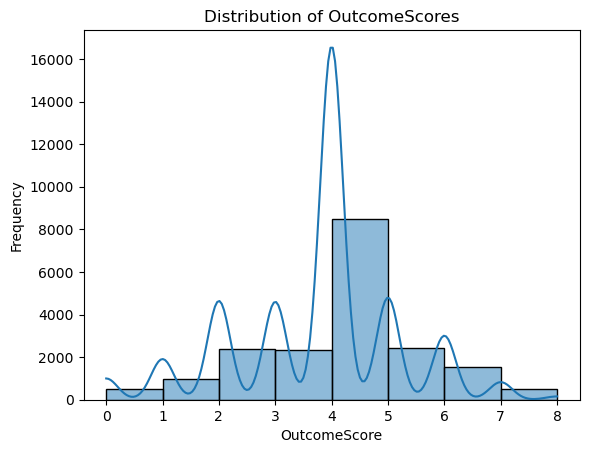

In [11]:
sns.histplot(y, kde=True, bins=8)
plt.title('Distribution of OutcomeScores')
plt.xlabel('OutcomeScore')
plt.ylabel('Frequency')
plt.show()

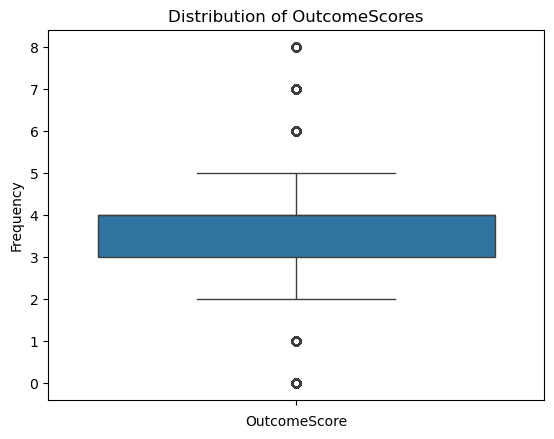

In [12]:
sns.boxplot(y)
plt.title('Distribution of OutcomeScores')
plt.xlabel('OutcomeScore')
plt.ylabel('Frequency')
plt.show()

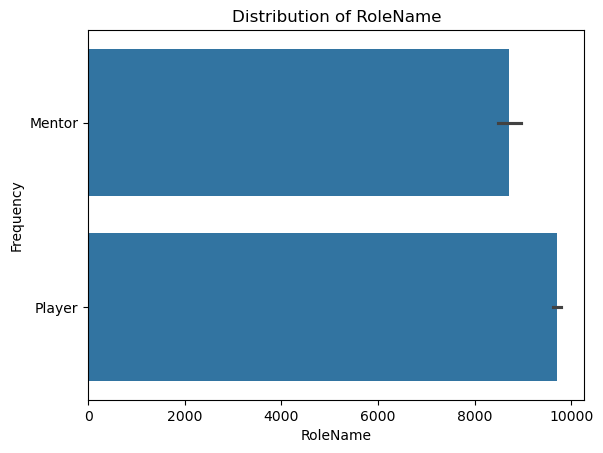

In [13]:
sns.barplot(dataset['RoleName'])
plt.title('Distribution of RoleName')
plt.xlabel('RoleName')
plt.ylabel('Frequency')
plt.show()

In [14]:
 dataset['ChatGroup'].nunique()

5

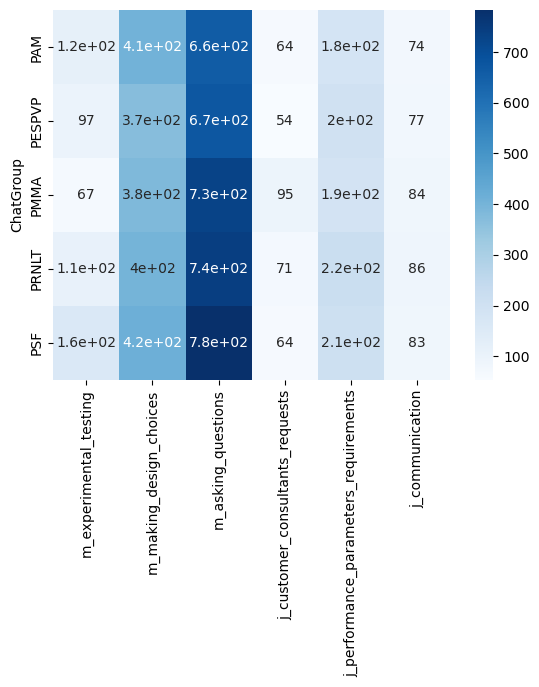

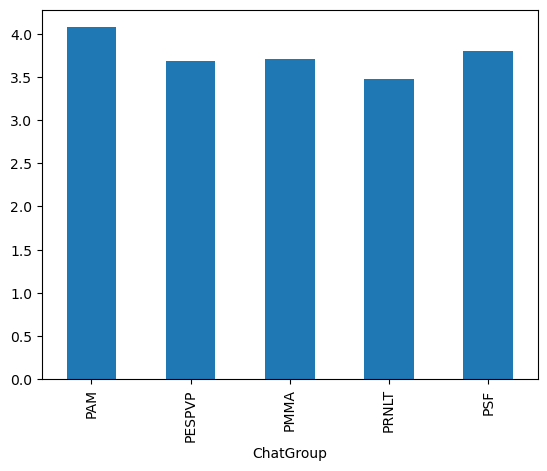

In [15]:
design_moves = ['m_experimental_testing', 'm_making_design_choices', 'm_asking_questions', 
                'j_customer_consultants_requests', 'j_performance_parameters_requirements', 'j_communication']

# Example: Heatmap to show the count of key design moves by group
design_move_counts = dataset.groupby('ChatGroup')[design_moves].agg('sum')
sns.heatmap(design_move_counts, annot=True, cmap='Blues')
plt.show()

# Example: Bar plot of the final outcome scores
outcome_by_group = dataset.groupby('ChatGroup')['OutcomeScore'].mean()
outcome_by_group.plot(kind='bar')
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['RoleName'] = le.fit_transform(X['RoleName'])

C:\Users\aryak\AppData\Local\Temp\ipykernel_5808\2392250335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['RoleName'] = le.fit_transform(X['RoleName'])


In [17]:
X

,implementation,ChatGroup,content,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,wordCount
0,a,PRNLT,Hello team. Welcome to Nephrotex!,0,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,5
1,a,PRNLT,I'm Maria Williams. I'll be your design adviso...,0,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,11
2,a,PRNLT,I'm here to help if you have any questions.,0,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,9
3,a,PRNLT,Please introduce yourselves with the name you ...,0,Introduction and Workflow Tutorial with Entran...,0,0,0,1,0,0,51
4,a,PRNLT,I just want to make sure everyone has found th...,0,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...
19172,o,PESPVP,yes,1,Reflection team discussion of first batch results,0,0,0,0,0,0,1
19173,o,PESPVP,sounds good,1,Reflection team discussion of first batch results,0,0,0,0,0,0,2
19174,o,PESPVP,"Well, we are out of time for our meeting.",0,Reflection team discussion of first batch results,0,0,0,0,0,0,9
19175,o,PESPVP,Precisely,1,Reflection team discussion of first batch results,0,0,0,0,0,0,1


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [19]:
X

array([[0.0, 0.0, 0.0, ..., 0, 0, 5],
       [0.0, 0.0, 0.0, ..., 0, 0, 11],
       [0.0, 0.0, 0.0, ..., 0, 0, 9],
       ...,
       [0.0, 1.0, 0.0, ..., 0, 0, 9],
       [0.0, 1.0, 0.0, ..., 0, 0, 1],
       [0.0, 1.0, 0.0, ..., 0, 0, 11]], dtype=object)

In [20]:

dataset['roomName'].nunique()
dataset['implementation'].nunique()
dataset['RoleName'].nunique()
dataset['group_id'].nunique()
dataset['ChatGroup'].nunique()

5

In [56]:
roomName_groupby = dataset.groupby(['roomName'])
implementation_groupby = dataset.groupby(['implementation'])
roleName_groupby = dataset.groupby(['RoleName']) 
OutcomeScore_groupby = dataset.groupby(['OutcomeScore']) 
userIDs_groupby = dataset.groupby(['userIDs'], as_index = False)

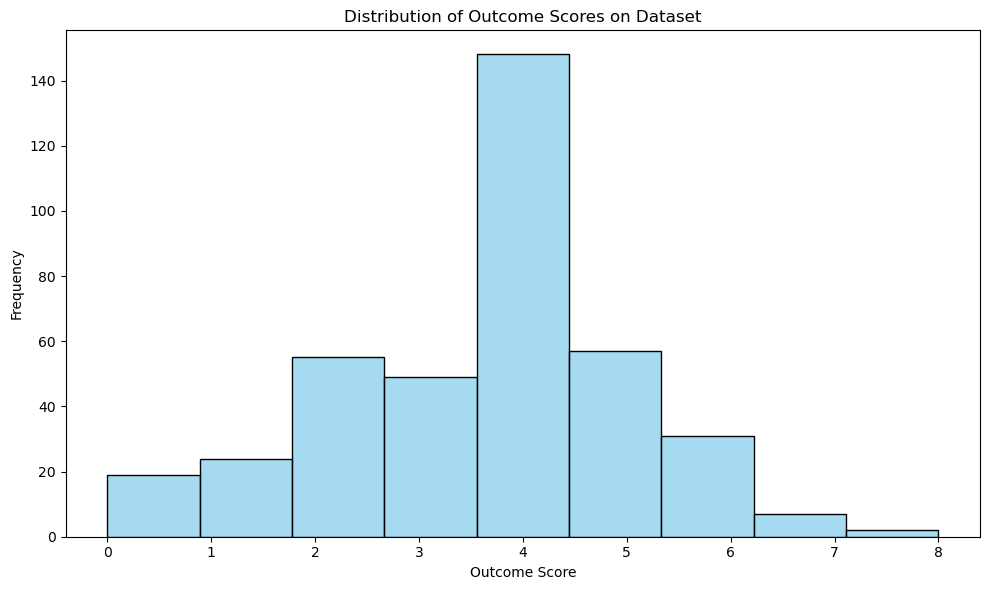

In [22]:
filt_player = dataset['RoleName'] == 'Player'
player_df = dataset.loc[filt_player]

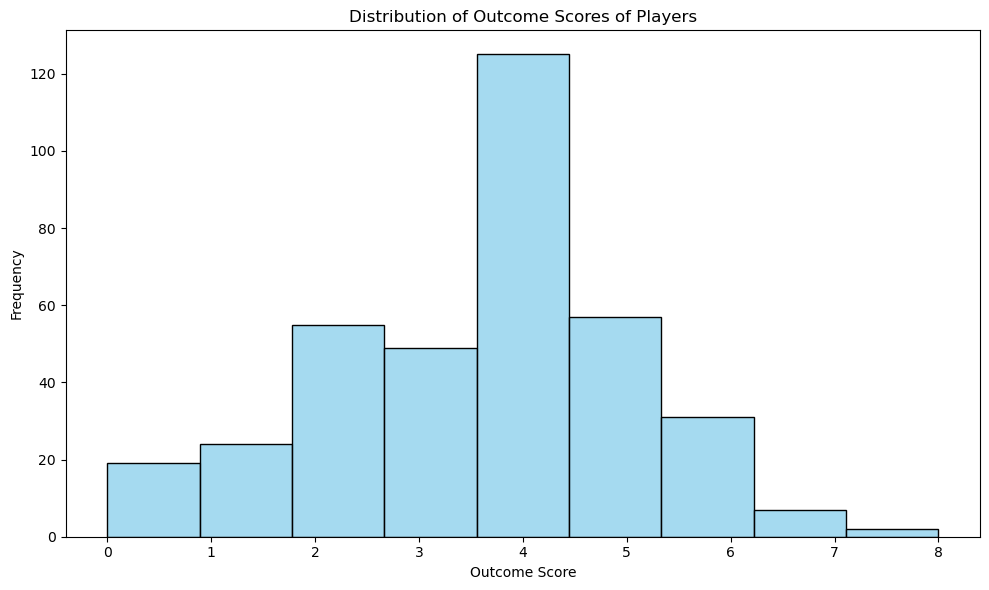

In [67]:
unique_scores = player_df.drop_duplicates(subset=['userIDs'])
unique_scores.reset_index()
plt.figure(figsize=(10, 6))
sns.histplot(unique_scores['OutcomeScore'], bins=9, color='skyblue', edgecolor='black')
plt.title("Distribution of Outcome Scores of Players")
plt.xlabel("Outcome Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [23]:
len(player_df)

16902

In [24]:
filt_mentor = dataset['RoleName'] == 'Mentor'
mentor_df = dataset.loc[filt_mentor]

In [25]:
len(mentor_df)

2275

In [26]:
implementation_counts = dataset['implementation'].value_counts()
roleName_counts = dataset['RoleName'].value_counts()
OutcomeScore_groupby = dataset['OutcomeScore'].value_counts()
OutcomeScore_groupby


OutcomeScore
4    8486
5    2450
2    2371
3    2350
6    1536
1     976
0     507
7     422
8      79
Name: count, dtype: int64

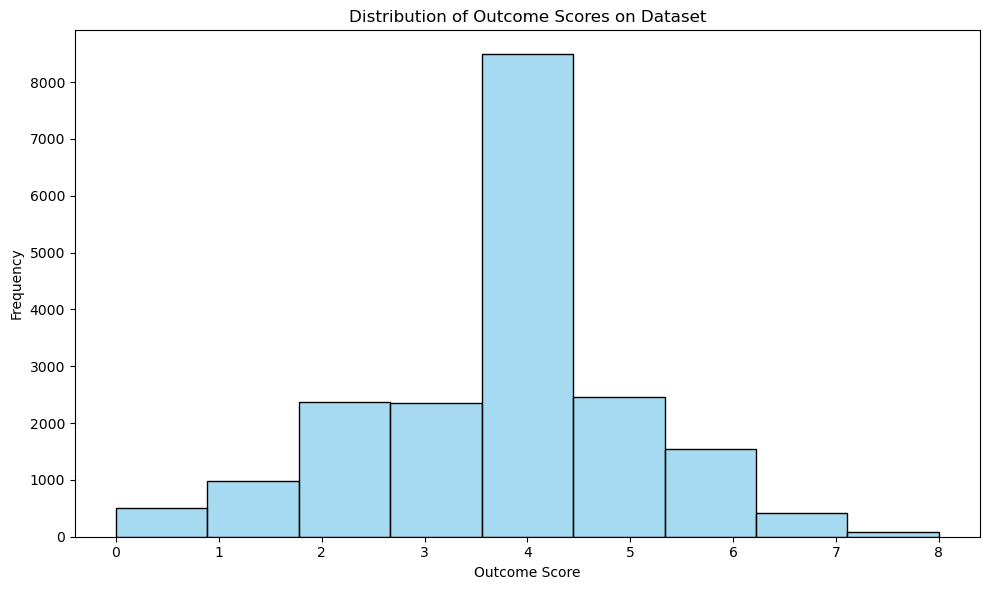

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['OutcomeScore'], bins=9, color='skyblue', edgecolor='black')
plt.title("Distribution of Outcome Scores on Dataset")
plt.xlabel("Outcome Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [47]:
len(player_df['userIDs'].unique())

369

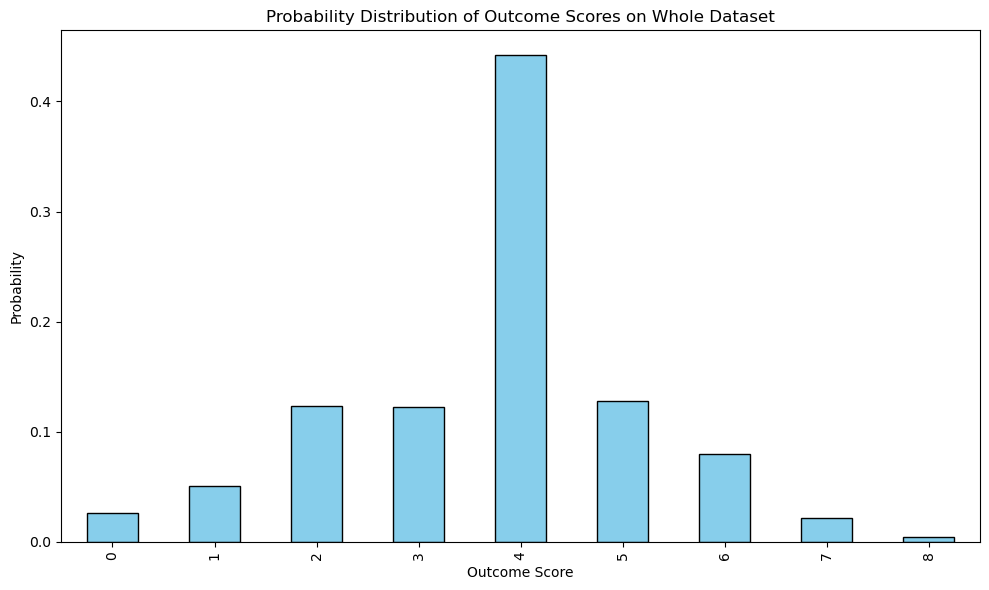

In [34]:
outcome_score_counts = dataset['OutcomeScore'].value_counts(normalize=True).sort_index()

# Plot the probability distribution (PMF)
plt.figure(figsize=(10, 6))
outcome_score_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Probability Distribution of Outcome Scores on Whole Dataset")
plt.xlabel("Outcome Score")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()


In [29]:
dataset = dataset.sort_values(by=['userIDs'])  # Replace with your time column name

# Check for team switches (when group_id changes for the same user)
dataset['team_switch'] = dataset.groupby('userIDs')['group_id'].shift() != dataset['group_id']

# Convert boolean values (True/False) to binary (1/0)
dataset['team_switch'] = dataset['team_switch'].astype(int)

# Display the rows where team switch occurred
team_switches = dataset[dataset['team_switch'] == 1]

In [30]:
team_switches

,index,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount,team_switch
0,0,1,a,1,PRNLT,Hello team. Welcome to Nephrotex!,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,5,1
590,590,1,a,591,PSF,After you've submitted a notebook and are wait...,4,Mentor,Graphing Surfactant Data,0,1,0,0,0,0,4,102,1
396,396,1,a,397,PMMA,How did you choose the best surfactant?,3,Mentor,Reflection team discussion of surfactants,0,1,1,0,0,0,4,7,1
589,589,1,a,590,PSF,I posted another notebook entry from my old in...,4,Mentor,Graphing Surfactant Data,1,0,0,0,0,0,4,41,1
117,117,1,a,118,PRNLT,"As an intern, I had to describe how certain in...",2,Mentor,Choose consultants to analyze,0,0,0,0,0,0,4,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18958,18961,389,o,18965,PESPVP,oh sorry my computer was lagging I see the mes...,6,Player,Choose consultants to analyze,0,0,0,0,0,0,7,11,1
19051,19054,390,o,19058,PESPVP,How many do we have now,6,Player,Team designs batch using 1 material,0,0,0,0,0,0,4,6,1
19092,19095,391,o,19099,PESPVP,which was the biggest problem I found,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,5,7,1
19023,19026,392,o,19030,PESPVP,yes,6,Player,Team designs batch using 1 material,0,0,0,0,0,0,5,1,1


In [31]:
filt_player = dataset['RoleName'] == 'Player'
player_df = dataset.loc[filt_player]
player_df

,index,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount,team_switch
340,340,2,a,341,PRNLT,okay meeting is done?,2,Player,Reflection team discussion of first batch results,0,0,1,0,0,0,4,4,1
344,344,2,a,345,PRNLT,Haha bye guys!,2,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,4,3,0
319,319,2,a,320,PRNLT,okay so negative charge it is.,2,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,4,6,0
339,339,2,a,340,PRNLT,I would agree with tyler,2,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,4,5,0
180,180,2,a,181,PRNLT,I think that it should stay at 10% as well,2,Player,Team designs batch using 1 material,0,1,0,0,0,0,4,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19122,19125,393,o,19129,PESPVP,We determined a base prototype that would serv...,6,Player,Reflection team discussion of first batch results,1,0,0,0,0,0,4,15,0
18941,18944,393,o,18948,PESPVP,Sounds perfect.,6,Player,Reflection team discussion of surfactants,0,0,0,0,0,0,4,2,0
19024,19027,393,o,19031,PESPVP,"Carly, I think your prototype #1 is the same a...",6,Player,Team designs batch using 1 material,0,0,0,0,0,0,4,11,0
18901,18904,393,o,18908,PESPVP,Yes,6,Player,Reflection team discussion of surfactants,0,0,0,0,0,0,4,1,0


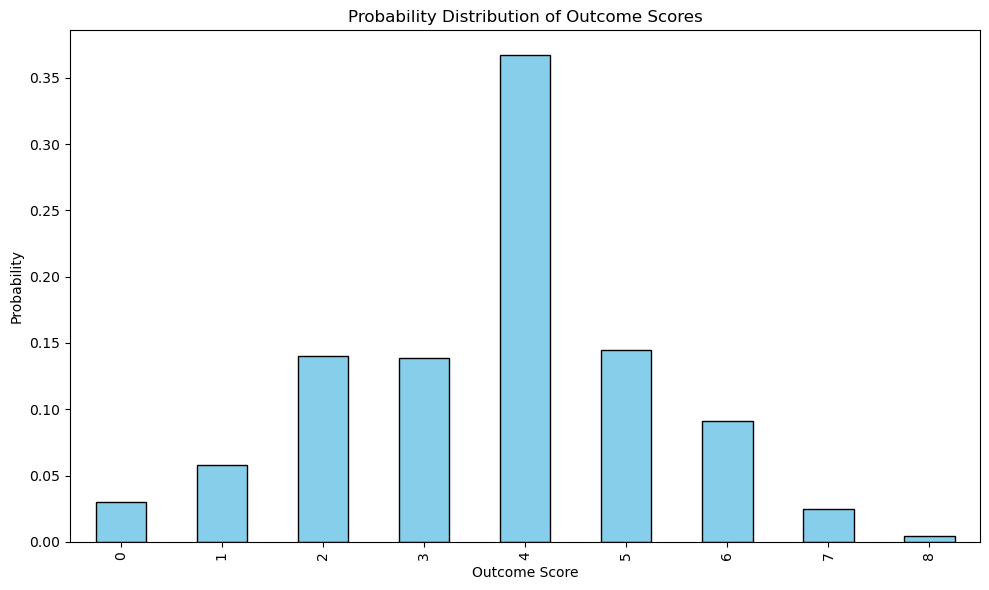

In [32]:
outcome_score_counts = player_df['OutcomeScore'].value_counts(normalize=True).sort_index()

# Plot the probability distribution (PMF)
plt.figure(figsize=(10, 6))
outcome_score_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Probability Distribution of Outcome Scores With ")
plt.xlabel("Outcome Score")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()

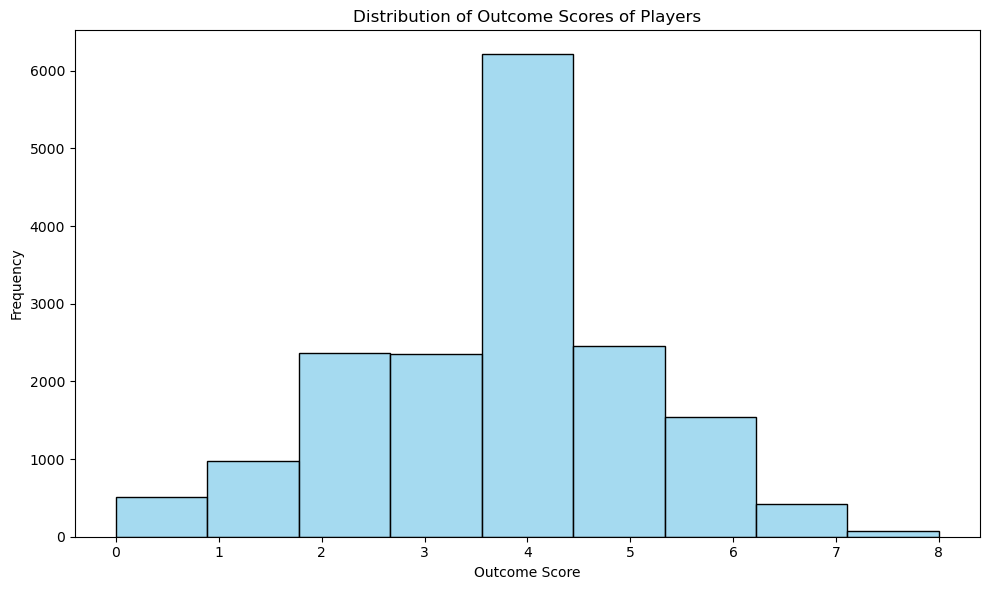

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(player_df['OutcomeScore'], bins=9, color='skyblue', edgecolor='black')
plt.title("Distribution of Outcome Scores of Players")
plt.xlabel("Outcome Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()